##Topic : Handwritten Digit Classification
##Name : Astha Modi

##1. Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras

##2. Loading Dataset

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


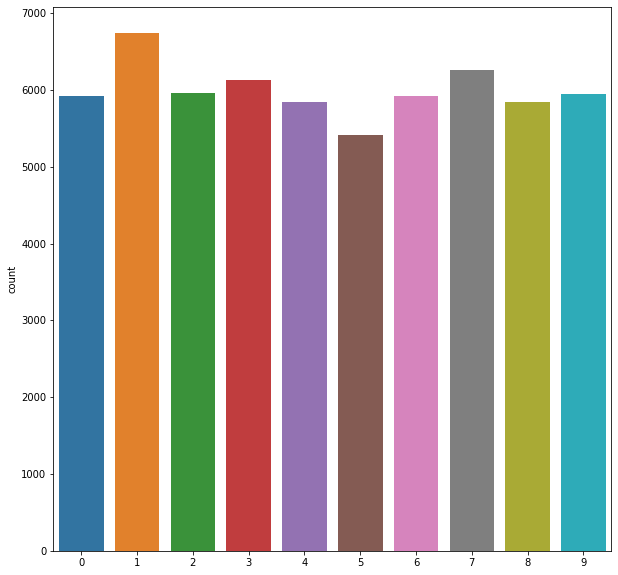

In [6]:
plt.figure(figsize = (10,10))
sns.countplot(y_train)

In [7]:
def show(x, index):
  plt.figure(figsize=(5,2))
  plt.imshow(x[index], cmap = plt.cm.binary)

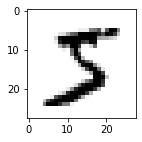

In [8]:
show(X_train, 0)

##3. Preprocessing the data

In [9]:
print('Training images shape:', X_train.shape)
print('Testing images shape:', X_test.shape)

Training images shape: (60000, 28, 28)
Testing images shape: (10000, 28, 28)


In [10]:
x_train = X_train.reshape(X_train.shape[0], 28,28,1)
x_test = X_test.reshape(X_test.shape[0], 28,28,1)
input_shape = (28,28,1)

In [11]:
#applying normalization
x_train = x_train/255
x_test = x_test/255
num_classes = 10

##4. Creating Model 
###Model Architecture
We will have to create model and train it according to our dataset. We are going to add the following layers:
*   Conv2D - the convolution layer
*   Dropout - to prevent overfitting 
*   Dense - a fully connected layer
*   Softmax activation - This is used to convert all predictions into probability

This model can be tuned to get optimal performance.

**CNN + Three layers + relu + (3,3)kernel_Size + Dropout rate(0.3)**



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [13]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation=tf.nn.relu, input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation= tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation = tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation = tf.nn.softmax))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 128)       512       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        1

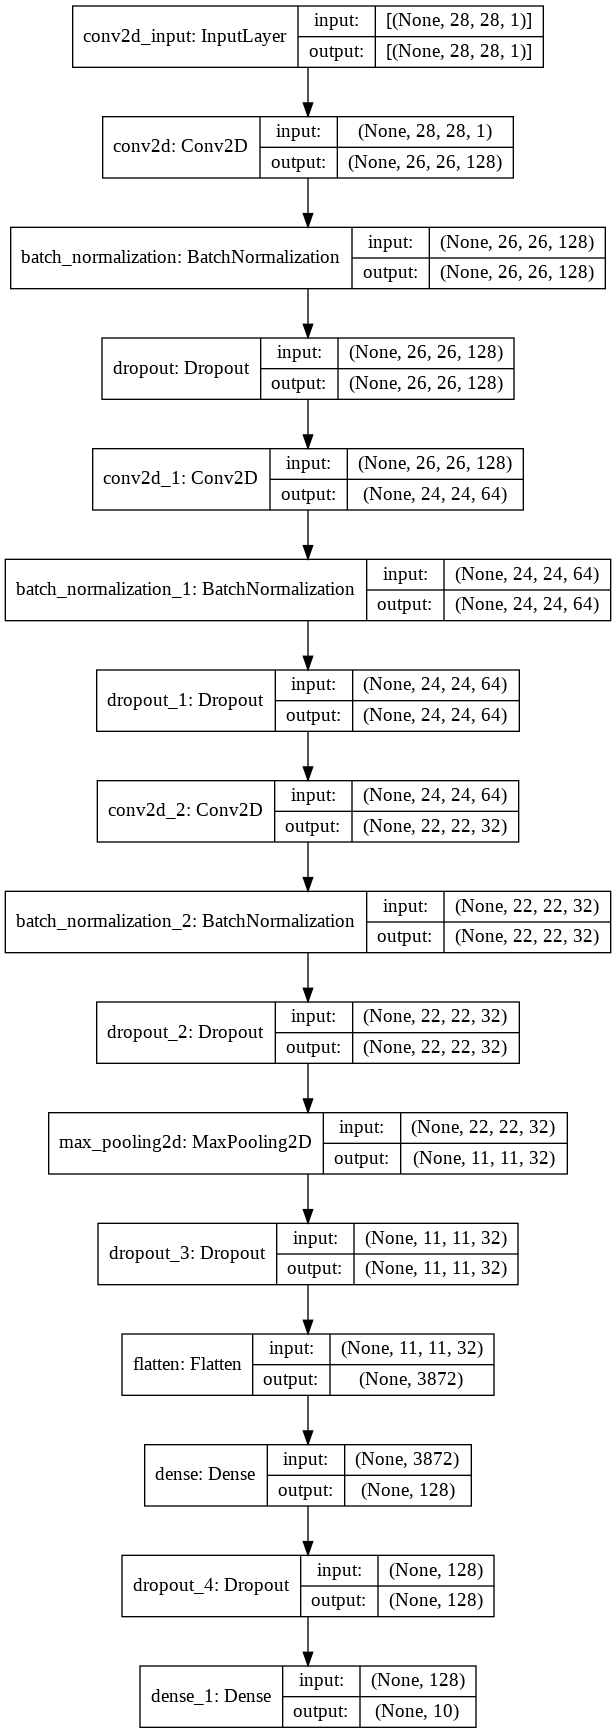

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, to_file ='model.png')

##5. Training the model

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 58s 17ms/step - loss: 0.2681 - accuracy: 0.9219 - val_loss: 0.0766 - val_accuracy: 0.9835
Epoch 2/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.1105 - accuracy: 0.9684 - val_loss: 0.0612 - val_accuracy: 0.9858
Epoch 3/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0863 - accuracy: 0.9749 - val_loss: 0.1154 - val_accuracy: 0.9813
Epoch 4/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0727 - accuracy: 0.9788 - val_loss: 0.1120 - val_accuracy: 0.9827
Epoch 5/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0673 - accuracy: 0.9806 - val_loss: 0.1116 - val_accuracy: 0.9832
Epoch 6/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0601 - accuracy: 0.9831 - val_loss: 0.2169 - val_accuracy: 0.9772
Epoch 7/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0522 - accuracy: 0.9847 - val_loss: 0.1094 -

In [17]:
model.save('task7')

INFO:tensorflow:Assets written to: task7/assets


In [18]:
from tensorflow.keras.models import load_model
model = load_model('task7')

##6. Evaluating the model

In [19]:
loss_and_acc = model.evaluate(x_test, y_test)
print("Test Loss:", loss_and_acc[0])
print("Test Accuracy:", loss_and_acc[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0957 - accuracy: 0.9852
Test Loss: 0.09568194299936295
Test Accuracy: 0.9851999878883362


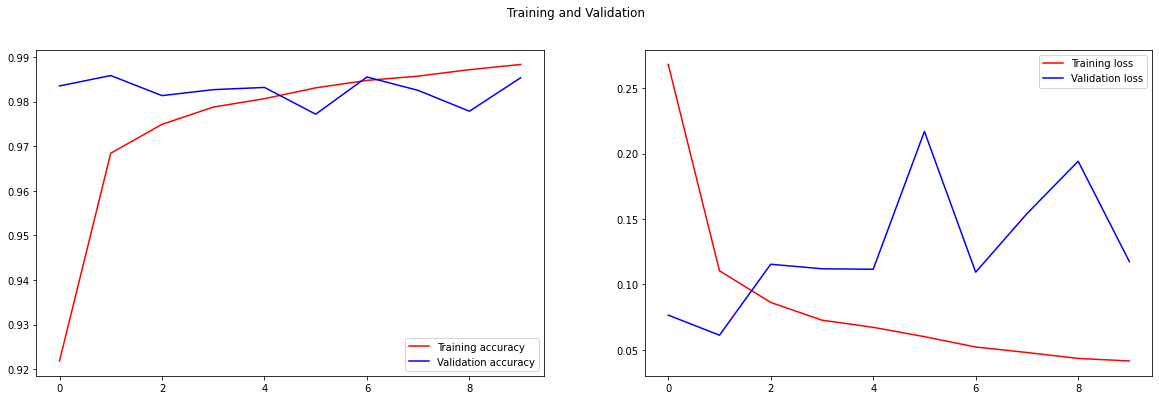

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(20,6))
ax[0].plot(epochs, acc, 'r', label = 'Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label = 'Training loss')
ax[1].plot(epochs, val_loss, 'b', label = 'Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and Validation')
plt.show()

##7. Confusion Matrix

In [21]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1134,    1,    0,    0,    0,    0,    0,    0,    0],
       [   1,   19, 1005,    0,    0,    0,    2,    5,    0,    0],
       [   0,    1,    0, 1004,    0,    3,    0,    2,    0,    0],
       [   0,    7,    3,    0,  953,    0,    5,    2,    1,   11],
       [   0,    1,    0,    4,    0,  885,    2,    0,    0,    0],
       [   3,    6,    0,    0,    1,    4,  944,    0,    0,    0],
       [   0,    5,    4,    1,    0,    0,    0, 1018,    0,    0],
       [   4,    3,    3,    6,    0,    2,    1,    4,  941,   10],
       [   1,    3,    0,    1,    1,    3,    0,    7,    1,  992]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

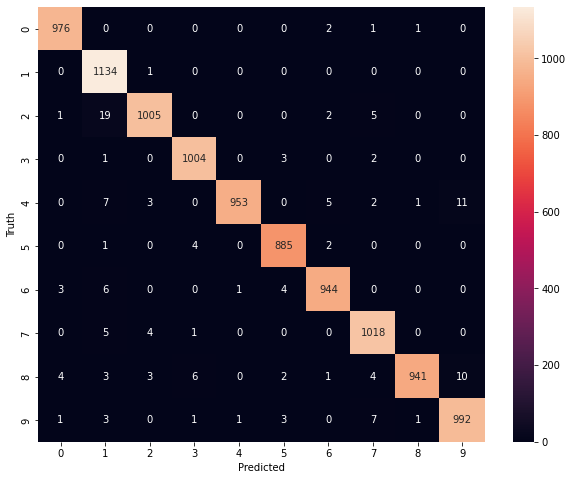

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##8. Testing the model

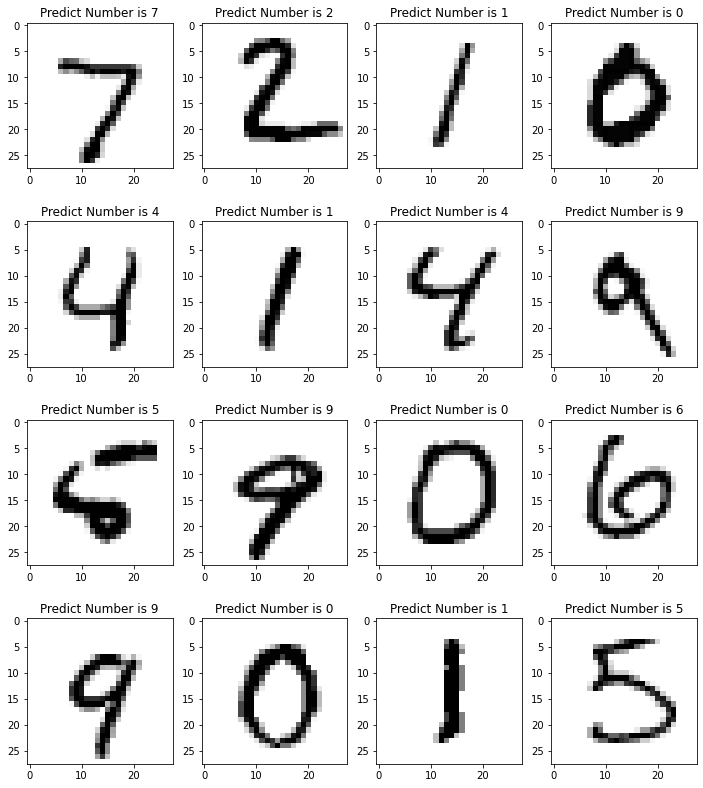

In [23]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Predict Number is {y_pred[i].argmax()}");

##**Thank You!!**